Importing the Dependencies

In [ ]:
#Importing Panda for Basic Operation
import pandas as pd
#Importing Matplotlib and Seasborn for Various Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#For Style
from matplotlib import Style
#Setting The Style as Seasborn
style.use('seaborn')
#For Splitting  The data arrays into 2 subsets: 1 for training data and another for testing data
from sklearn.model_selection import train_test_split
#For LinearRegression Model
from sklearn.linear_model import LinearRegression
#For Lasso Model
from sklearn.linear_model import Lasso
#
from sklearn import preprocessing
#
import numpy as np

ImportError: ignored

Data Collection and Processing

In [ ]:
# Loading The Data from CSV file to Pandas Dataframe
dataset = pd.read_csv('/content/sample_data/Car Data.csv')

In [ ]:
#Inspecting 5 rows of Data from the Dataframe using head() function
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
#Checking The number of Rows and Columns
dataset.shape

(4340, 8)

***In This Dataset, There are 8 Features and 4340 sets of data. We are getting insight of the dataset by using dataset_name.info()***



In [ ]:
#Get The Information of The Dataset using info() fucntion [1]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
#For Numerical representation of the Dataset(Count, Mean, STD, Min, Percentage, Max) use describe() function
dataset.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


***There can be null/missing values among the data. we are checking whether there is any null/missing value in this dataset.***

***To solve null/missing value***
1.   ***Remove row of the dataset***
2.   ***Remove attributes***
3.   ***Add some meaningful value such as mean, avg etc***

In [ ]:
#Check the misiing Values using isnull().sum() function [7]
dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
#Checking The Distribution of Catagorical Data
print(dataset.fuel.value_counts())
print(dataset.seller_type.value_counts())
print(dataset.transmission.value_counts())
print(dataset.owner.value_counts())

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64
Manual       3892
Automatic     448
Name: transmission, dtype: int64
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


In [ ]:
#Checking The Distribution of Numerical Data
print(dataset.name.value_counts())
print(dataset.year.value_counts())
print(dataset.selling_price.value_counts())
print(dataset.km_driven.value_counts())

***In this Dataset there are 4 Numerical Values. These are***

1.  ***Car Name***
2.   ***The year when the car first bought***
3.   ***Selling Price of the car***
4.   ***Km driven***

***To understand how the numrical values are distributed, we are using histogram with intervals of 10.***




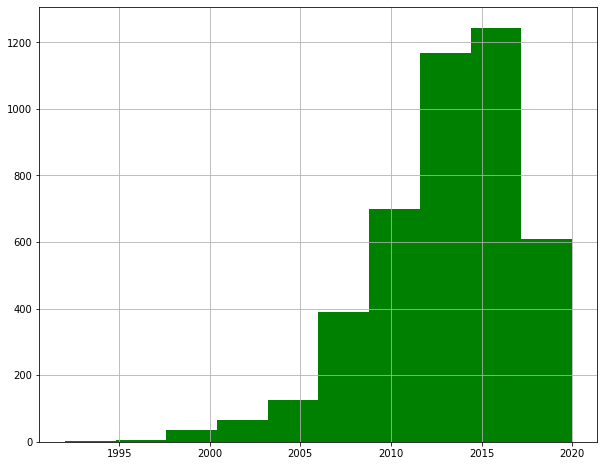

In [ ]:
#Histogram for the numerical features [2]
plt.figure(figsize=(10,8))
dataset['year'].hist(bins=10, color='green')
#bins=Intervals
plt.show()

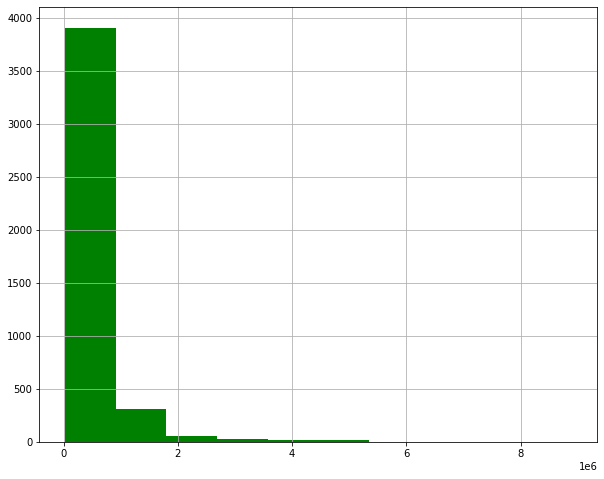

In [ ]:
plt.figure(figsize=(10,8))
dataset['selling_price'].hist(bins=10, color='green')
plt.show()

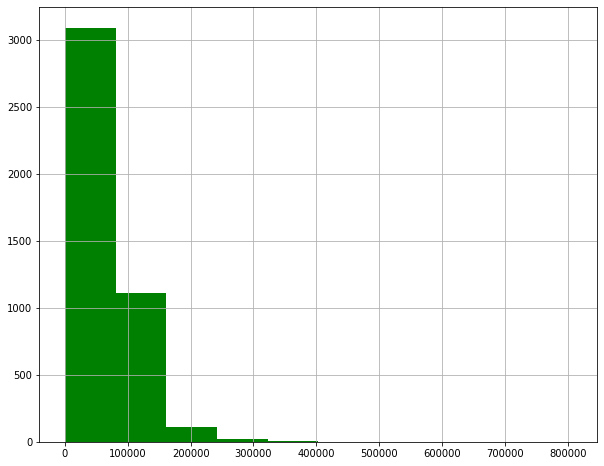

In [ ]:
plt.figure(figsize=(10,8))
dataset['km_driven'].hist(bins=10, color='green')
plt.show()

Since 'Name' Feature is a text Value, python can not find any continuous data link contiuous numerical value. So when we are using Histogram function

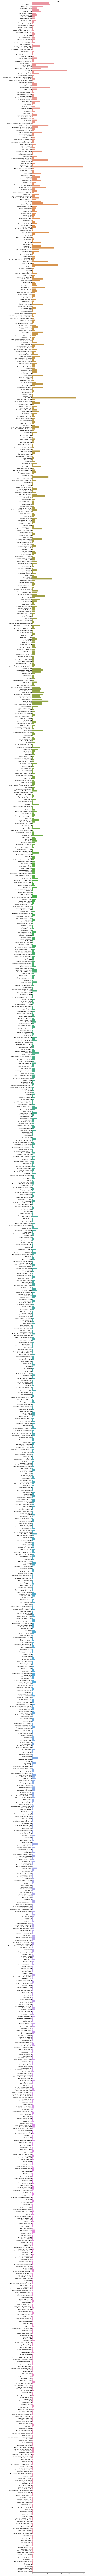

In [ ]:
#Unable to draw histogram, Non-Continuous Data
#For Name Column in the Dataset with its Count use countplot() function
plt.figure(figsize=(10,500))
#Flagsize(Width,Height)
sns.countplot(y='name', data=dataset)
#Plot Title
plt.title('Name')
#Display Plot
plt.show()

In [ ]:
#For all Columns use column method
dataset.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [ ]:
#For Different Transmission Type in the Dataset to show in bar use countplot() function
sns.countplot(x='transmission', data=dataset)
#Plot Title
plt.title('Transmission Types in The Dataset')
#Display Plot
plt.show()

In [ ]:
#For Different Transmission Type in the Dataset in Pie Chart
#Figure Size
fig = plt.figure(figsize=(10,10))
#Color for each part
colors = ("red","green")
#Define Line Width, Edge Color
wp ={'linewidth':2, 'edgecolor':"black"}
#How much the Pie should be Exploded
explode=(0.2,0.2)
#Initialize Tags
tags = dataset['transmission'].value_counts()
#Plot The Pie Chart
tags.plot(kind='pie', autopct='%1.1f%%', shadow='true', colors=colors, startangle=90,
          wedgeprops=wp, explode=explode,  label='')
plt.title('Transmission Types in The Dataset in Pie Chart')
plt.show()

In [ ]:
#Stratified sampling [8]
#Disproportionate Sampling
#For each subgroup to have a similar level of variance, Sampling should be a similar sample size for each subgroup
#Since Not all Sub group have 10 Sample. There will be an Error as Sample size is larger than Population
# Randomly Choose 1 Sample from Each Type of Car Name
dataset.groupby('name', group_keys=False).apply(lambda x: x.sample(1))


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4016,Ambassador CLASSIC 1500 DSL AC,2005,120000,50000,Diesel,Individual,Manual,Second Owner
2878,Ambassador Classic 2000 Dsz,2002,50000,120000,Diesel,Individual,Manual,Fourth & Above Owner
3465,Ambassador Grand 1800 ISZ MPFI PW CL,2012,430000,50000,Petrol,Individual,Manual,Second Owner
3458,Audi A4 1.8 TFSI,2012,1200000,60000,Petrol,Individual,Automatic,Third Owner
3094,Audi A4 2.0 TDI,2011,1295000,58000,Diesel,Dealer,Automatic,First Owner
...,...,...,...,...,...,...,...,...
1573,Volkswagen Vento Petrol Highline AT,2011,300000,70000,Petrol,Individual,Automatic,Third Owner
103,Volvo V40 D3 R Design,2018,1975000,21000,Diesel,Dealer,Automatic,First Owner
4047,Volvo XC 90 D5 Inscription BSIV,2017,4500000,80000,Diesel,Individual,Automatic,First Owner
3320,Volvo XC60 D3 Kinetic,2012,1750000,115992,Diesel,Dealer,Automatic,Third Owner


In [ ]:
# Randomly Choose 1 Sample from Each Type of Selling Price
dataset.groupby('selling_price', group_keys=False).apply(lambda x: x.sample(1))

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
2662,Ford Ikon 1.6 ZXI NXt,2005,20000,25000,Petrol,Individual,Manual,Second Owner
2495,Ford Ikon 1.4 ZXi,2000,22000,42743,Petrol,Dealer,Manual,Third Owner
2444,Maruti 800 EX,2004,30000,60000,Petrol,Individual,Manual,Third Owner
1832,Tata Nano LX SE,2012,35000,35000,Petrol,Individual,Manual,Third Owner
4290,Maruti 800 Std,2004,37500,90000,Petrol,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
3883,BMW 5 Series 520d Luxury Line,2019,4800000,12999,Diesel,Dealer,Automatic,First Owner
919,BMW X5 xDrive 30d xLine,2019,4950000,30000,Diesel,Dealer,Automatic,First Owner
3969,Mercedes-Benz GLS 2016-2020 350d 4MATIC,2016,5500000,77350,Diesel,Dealer,Automatic,First Owner
89,Mercedes-Benz S-Class S 350d Connoisseurs Edition,2017,8150000,6500,Diesel,Dealer,Automatic,First Owner


In [ ]:
# Randomly Choose 1 Sample from Each Type of Distance The Car has Driven
dataset.groupby('km_driven', group_keys=False).apply(lambda x: x.sample(1))


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
1312,Mahindra Quanto C6,2014,250000,1,Diesel,Individual,Manual,Second Owner
1714,Ford Freestyle Titanium Diesel,2020,784000,101,Diesel,Dealer,Manual,Test Drive Car
2360,Renault KWID Climber 1.0 MT Opt BSIV,2020,541000,1000,Petrol,Dealer,Manual,Test Drive Car
1902,Ford Freestyle Titanium Plus Diesel,2019,750000,1001,Diesel,Dealer,Manual,First Owner
1779,Ford Freestyle Titanium,2020,811999,1010,Petrol,Dealer,Manual,Test Drive Car
...,...,...,...,...,...,...,...,...
3718,Toyota Innova 2.5 GX 8 STR BSIV,2009,420000,347089,Diesel,Dealer,Manual,First Owner
69,Chevrolet Tavera Neo LS B3 - 7(C) seats BSIII,2010,280000,350000,Diesel,Individual,Manual,Second Owner
3679,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,2006,400000,400000,Diesel,Individual,Manual,Third Owner
4184,Maruti SX4 S Cross DDiS 320 Delta,2016,665000,560000,Diesel,Dealer,Manual,First Owner


In [ ]:
# Randomly Choose 1 Sample from Each Type of Fuel
dataset.groupby('year', group_keys=False).apply(lambda x: x.sample(1))

#Something is Wrong

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
3334,Maruti 800 AC BSII,1992,50000,100000,Petrol,Individual,Manual,Fourth & Above Owner
631,Maruti Gypsy E MG410W ST,1995,95000,100000,Petrol,Individual,Manual,Second Owner
61,Mahindra Jeep CL 500 MDI,1996,250000,35000,Diesel,Individual,Manual,Second Owner
3661,Maruti 800 Std,1997,50000,80000,Petrol,Individual,Manual,Second Owner
2342,Maruti Omni 5 Str STD,1998,65000,60000,Petrol,Dealer,Manual,Third Owner
2904,Maruti Zen LX,1999,70000,70000,Petrol,Individual,Manual,Fourth & Above Owner
2560,Maruti Wagon R VXI,2000,105000,80000,Petrol,Individual,Manual,First Owner
1502,Mercedes-Benz E-Class 220 CDI,2001,350000,100000,Diesel,Individual,Manual,Second Owner
3177,Maruti Alto VXi,2002,120000,60000,Petrol,Individual,Manual,Third Owner
2198,Hyundai Santro Xing XG,2003,85000,110000,Petrol,Individual,Manual,Second Owner


In [ ]:
# Randomly Choose 10 Samples from Each Type of Seller
dataset.groupby('seller_type', group_keys=False).apply(lambda x: x.sample(10))

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
2460,Maruti Alto VXi,2015,280000,26134,Petrol,Dealer,Manual,First Owner
2538,Mahindra KUV 100 D75 K4 Plus 5Str,2016,470000,31367,Diesel,Dealer,Manual,First Owner
2303,Ford Ecosport 1.5 DV5 MT Titanium Optional,2014,450000,99117,Diesel,Dealer,Manual,First Owner
4150,Honda Amaze S i-Dtech,2014,421000,69000,Diesel,Dealer,Manual,First Owner
3825,Honda Amaze VX AT i-Vtech,2014,440000,46000,Petrol,Dealer,Automatic,First Owner
3869,Hyundai Getz 1.5 CRDi GVS,2008,235000,60208,Diesel,Dealer,Manual,First Owner
3154,Maruti Swift Dzire VDI,2017,611000,34400,Diesel,Dealer,Manual,First Owner
4251,Renault Duster 85PS Diesel RxE,2013,425000,170000,Diesel,Dealer,Manual,First Owner
352,Maruti Eeco 5 STR With AC Plus HTR CNG,2012,229999,75000,CNG,Dealer,Manual,First Owner
2328,Honda Amaze VX Diesel BSIV,2018,790000,49000,Diesel,Dealer,Manual,First Owner


In [ ]:
# Randomly Choose 10 Samples from Each Type of Transmission
dataset.groupby('transmission', group_keys=False).apply(lambda x: x.sample(10))

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
1910,Hyundai Creta 1.6 CRDi AT SX Plus,2016,875000,74000,Diesel,Individual,Automatic,First Owner
2350,Mercedes-Benz B Class B180 Sports,2013,1100000,40000,Petrol,Individual,Automatic,Second Owner
623,Audi A6 2.0 TDI Premium Plus,2013,1300000,58500,Diesel,Dealer,Automatic,First Owner
1736,Honda Amaze S AT i-Vtech,2014,400000,15000,Petrol,Individual,Automatic,First Owner
2531,Maruti Alto K10 VXI AGS,2017,375000,27289,Petrol,Dealer,Automatic,First Owner
323,Mitsubishi Outlander 2.4,2012,525000,140000,Petrol,Individual,Automatic,First Owner
777,Hyundai Verna 1.6 VTVT AT S Option,2016,770000,10000,Petrol,Individual,Automatic,First Owner
1077,Audi A4 3.0 TDI Quattro,2013,1580000,86000,Diesel,Dealer,Automatic,First Owner
99,Audi A4 2.0 TDI 177 Bhp Premium Plus,2013,1150000,53000,Diesel,Dealer,Automatic,First Owner
3287,Hyundai Tucson 2.0 e-VGT 2WD AT GL,2018,1600000,40000,Diesel,Individual,Automatic,First Owner


In [ ]:
# Randomly Choose 10 Samples from Each Type of Owner
dataset.groupby('owner', group_keys=False).apply(lambda x: x.sample(10))

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
1335,Mahindra Thar DI 4X4 PS,2016,700000,50000,Diesel,Individual,Manual,First Owner
1195,Maruti Baleno Zeta,2020,700000,1100,Petrol,Individual,Manual,First Owner
2783,Maruti Zen LX,2001,62000,70000,Petrol,Individual,Manual,First Owner
2426,Hyundai i20 Magna Optional 1.2,2013,340000,35000,Petrol,Individual,Manual,First Owner
3400,Maruti Swift Dzire ZXI,2016,620000,35000,Petrol,Individual,Manual,First Owner
4009,Ford EcoSport 1.5 Diesel Titanium Plus BSIV,2018,930000,20000,Diesel,Individual,Manual,First Owner
4244,Hyundai i20 1.4 Sportz,2017,680000,44000,Diesel,Dealer,Manual,First Owner
585,Audi A6 2.0 TDI Premium Plus,2013,1300000,58500,Diesel,Dealer,Automatic,First Owner
2233,Maruti Celerio LXI MT BSIV,2019,340000,50000,Petrol,Individual,Manual,First Owner
250,Maruti Omni MPI STD BSIV,2018,200000,10000,Petrol,Individual,Manual,First Owner


In [ ]:
#One hot encoding for categorical features  [9]
one_hot_encoded_data = pd.get_dummies(dataset, columns = ['name','fuel', 'seller_type',
       'transmission', 'owner'])
print(one_hot_encoded_data)

      year  selling_price  km_driven  name_Ambassador CLASSIC 1500 DSL AC  \
0     2007          60000      70000                                    0   
1     2007         135000      50000                                    0   
2     2012         600000     100000                                    0   
3     2017         250000      46000                                    0   
4     2014         450000     141000                                    0   
...    ...            ...        ...                                  ...   
4335  2014         409999      80000                                    0   
4336  2014         409999      80000                                    0   
4337  2009         110000      83000                                    0   
4338  2016         865000      90000                                    0   
4339  2016         225000      40000                                    0   

      name_Ambassador Classic 2000 Dsz  \
0                                

In [ ]:
#Normalization for numerical [10]
x_array = np.array(dataset['year'])
normalized_arr = preprocessing.normalize([x_array])
print(normalized_arr)

NameError: ignored

In [ ]:
x_array = np.array(dataset['selling_price'])
normalized_arr = preprocessing.normalize([x_array])
print(normalized_arr)

NameError: ignored

In [ ]:
x_array = np.array(dataset['km_driven'])
normalized_arr = preprocessing.normalize([x_array])
print(normalized_arr)

NameError: ignored

In [ ]:
#For Correlation Matrix using corr() Function [11]
dataset.corr()

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000
